In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../listings.csv')

### Vamos fazer uma cópia do data frame original e modificar a cópia mantendo a original intacta

In [48]:
df_copy = df.copy()

In [6]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,706258,luxury self –contained studios,3629429,Enjoy,NaN,San Lorenzo,40.85114,14.25063,Private room,103,1,8,2019-09-12,0.09,2,347,0,NaN
1,709020,Casa Frammenti (ex DormidaMè Museo),3647842,Livio & Chiara,NaN,Avvocata,40.85330,14.24590,Private room,300,2,12,2022-06-05,0.10,11,325,1,NaN
2,714333,nice seaview studio wifi in center,808350,Giancarlo,NaN,Porto,40.84020,14.25516,Entire home/apt,90,1,58,2022-06-04,0.48,6,337,1,NaN
3,709069,B&B in city center,3647842,Livio & Chiara,NaN,Porto,40.84000,14.25463,Private room,220,2,69,2022-07-31,0.67,11,364,2,NaN
4,715014,Centre of Naples - Lovely mansard,2473289,Lucia,NaN,Porto,40.84308,14.25663,Entire home/apt,55,1,11,2019-04-27,0.11,1,317,0,NaN


### Como não vamos precisar nem do id nem do host_id  para nenhuma análise nem estudo estatístico não vamos retirá-las do data frame . host_id e host_name nos dão a mesma informação porém como existem valores que estão em branco para o host_name vamos ficar com o host_id que não tem nenhum valor em branco

In [49]:
df_copy.drop(["id", "host_name"], axis=1, inplace=True)

In [40]:
df_copy.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,luxury self –contained studios,3629429,NaN,San Lorenzo,40.85114,14.25063,Private room,103,1,8,2019-09-12,0.09,2,347,0,NaN
1,Casa Frammenti (ex DormidaMè Museo),3647842,NaN,Avvocata,40.85330,14.24590,Private room,300,2,12,2022-06-05,0.10,11,325,1,NaN
2,nice seaview studio wifi in center,808350,NaN,Porto,40.84020,14.25516,Entire home/apt,90,1,58,2022-06-04,0.48,6,337,1,NaN


### Podemos observar no gráfico abaixo que a percentagem de null values para as variáveis que possuem null values 

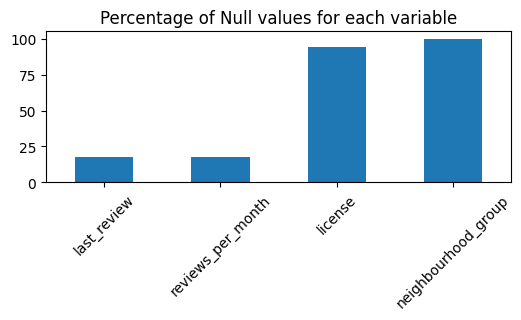

In [50]:
plt.figure(figsize=(6,2), dpi=100)
percentages_of_null = (df_copy.isnull().sum() / len(df_copy))*100
percentages_of_null[percentages_of_null>0].sort_values().plot(kind="bar")
plt.title("Percentage of Null values for each variable")
plt.xticks(rotation=45);

### Vamos retirar as variáveis 'licence' e 'neighbourhood_group' por terem 94% e 100% de valores em branco respevtivamente

In [51]:
df_copy.drop(["license", "neighbourhood_group"], axis=1, inplace=True)

In [52]:
percentages_of_null[percentages_of_null>0].sort_values()

last_review             17.579787
reviews_per_month       17.579787
license                 94.188830
neighbourhood_group    100.000000
dtype: float64

# A quem corresponde as reviews em falta?

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7520 entries, 0 to 7519
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            7520 non-null   object 
 1   host_id                         7520 non-null   int64  
 2   neighbourhood                   7520 non-null   object 
 3   latitude                        7520 non-null   float64
 4   longitude                       7520 non-null   float64
 5   room_type                       7520 non-null   object 
 6   price                           7520 non-null   int64  
 7   minimum_nights                  7520 non-null   int64  
 8   number_of_reviews               7520 non-null   int64  
 9   last_review                     6198 non-null   object 
 10  reviews_per_month               6198 non-null   float64
 11  calculated_host_listings_count  7520 non-null   int64  
 12  availability_365                75